# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Data Understanding, preparation and EDA

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
house = pd.read_csv("train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
# summary of the dataset: 1460 rows, 81 columns, has null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
for column in house.columns:
    print(column+" "+str(house[column].isnull().sum()))

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [7]:
#checking which columns have more than 70% NULL values
for column in house.columns:
    if round(100 * (house[column].isnull().sum()/len(house[column].index)), 2) > 70:
        print(column+" "+str(round(100 * (house[column].isnull().sum()/len(house[column].index)), 2)))

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


## Data Preparation

### Removing NULL values

In [8]:
# Eliminate the columns having more than 70% NULL values
house = house.drop(house.loc[:,list(round(100 * (house.isnull().sum()/len(house.index)),2) > 70)].columns,1)

In [9]:
#checking which columns have more than 70% NULL values
for column in house.columns:
    #if round(100 * (house[column].isnull().sum()/len(house[column].index)), 2) > 70:
    print(column+" "+str(round(100 * (house[column].isnull().sum()/len(house[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.74
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.55
MasVnrArea 0.55
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinSF1 0.0
BsmtFinType2 2.6
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.07
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageCars 0.0
GarageArea 0.0
GarageQual 5.55
GarageCond 5.55
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorch

**FireplaceQu**

In [10]:
#Starting from the columns with highest percentage of NULL values
house["FireplaceQu"].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

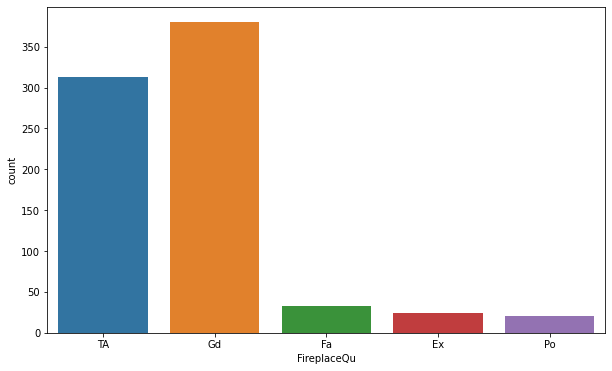

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(house["FireplaceQu"])

In [12]:
#Here good and average are the top values but deciding on either of the values would be a difficult decision so we add another class "unknown" and replace the NULL values with that
house["FireplaceQu"] = house["FireplaceQu"].fillna("Unknown")

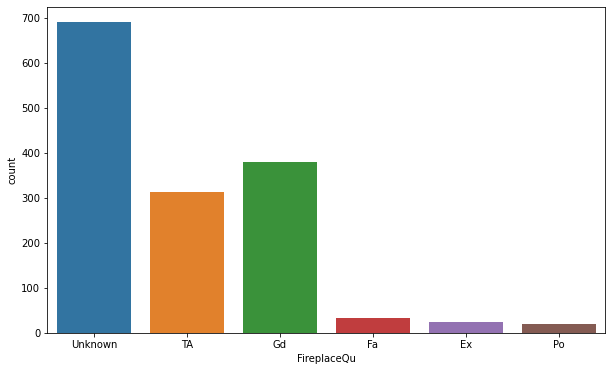

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(house["FireplaceQu"])

**LotFrontage**

In [14]:
house["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

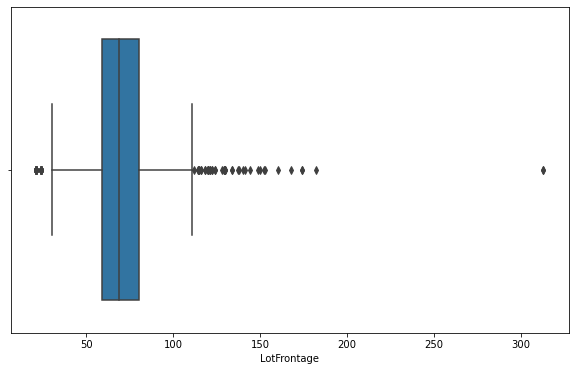

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(house["LotFrontage"])

In [16]:
house["LotFrontage"].mean()

70.04995836802665

In [17]:
# Filling NULL values with mean
house["LotFrontage"] = house["LotFrontage"].replace(np.NaN,house["LotFrontage"].mean())

In [18]:
#outliers are present here. They need to be removed
house["LotFrontage"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
5%         35.950000
25%        60.000000
50%        70.049958
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
# We will cap the values to the 95th percentile
percentile_95 = house["LotFrontage"].quantile([0.05,0.95]).values

In [20]:
percentile_95

array([ 35.95, 104.  ])

In [21]:
house["LotFrontage"][house["LotFrontage"] <= percentile_95[0]] = percentile_95[0]
house["LotFrontage"][house["LotFrontage"] >= percentile_95[1]] = percentile_95[1]

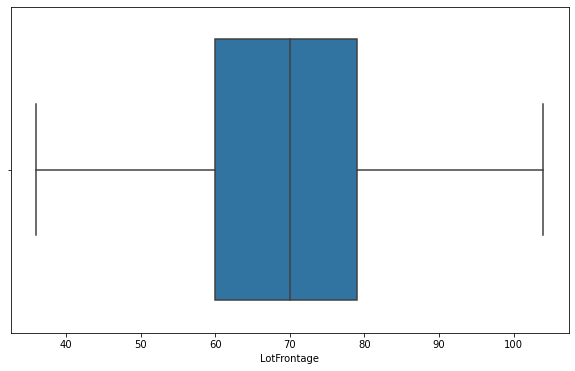

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(house["LotFrontage"])

**GarageType, GarageFinish, GarageQual, GarageCond**

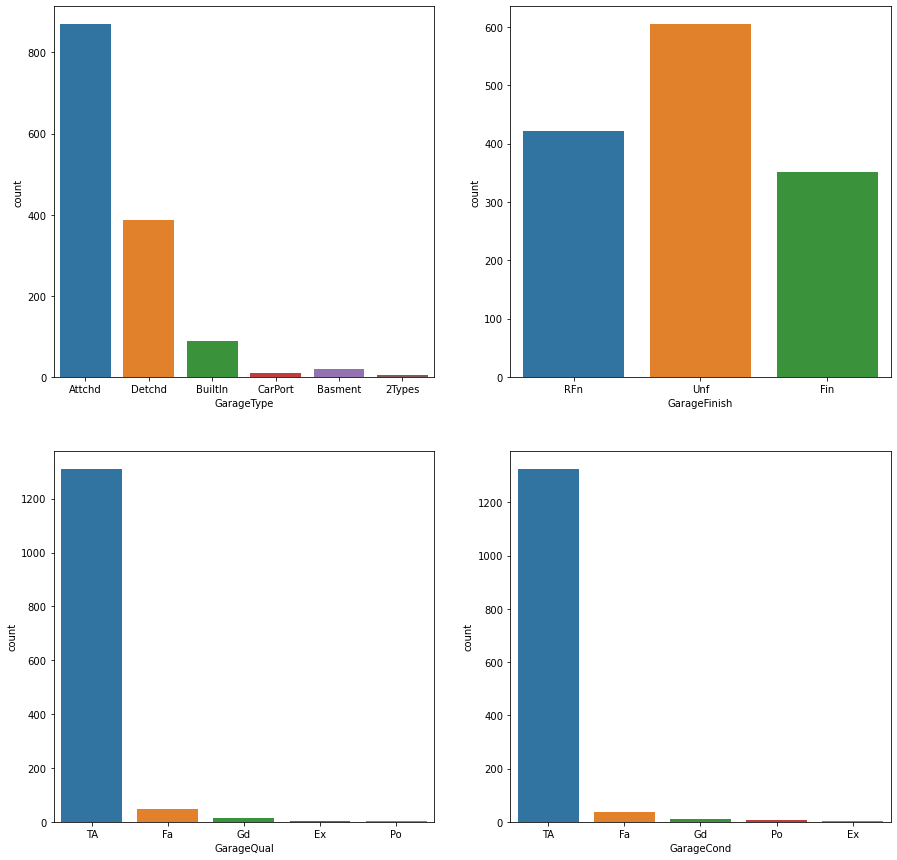

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(house["GarageType"])
plt.subplot(2,2,2)
sns.countplot(house["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(house["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(house["GarageCond"])


1. GarageType - Most values are of type "Attchd" so we replace NULL values with "Attchd"
2. GarageFinish - Most values are of type "Unf" so we replace NULL values with "Unf"
3. GarageQual - Most values are of type "TA" so we replace NULL values with "TA"
4. GarageCond - Most values are of type "TA" so we replace NULL values with "TA"

In [24]:
house["GarageType"] = house["GarageType"].fillna("Attchd")
house["GarageFinish"] = house["GarageFinish"].fillna("Unf")
house["GarageQual"] = house["GarageQual"].fillna("TA")
house["GarageCond"] = house["GarageCond"].fillna("TA")

**GarageYrBlt**

In [25]:
house["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [26]:
#replacing NULL values with 2005 as it occurs most
house["GarageYrBlt"] = house["GarageYrBlt"].replace(np.NaN,2005)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2**

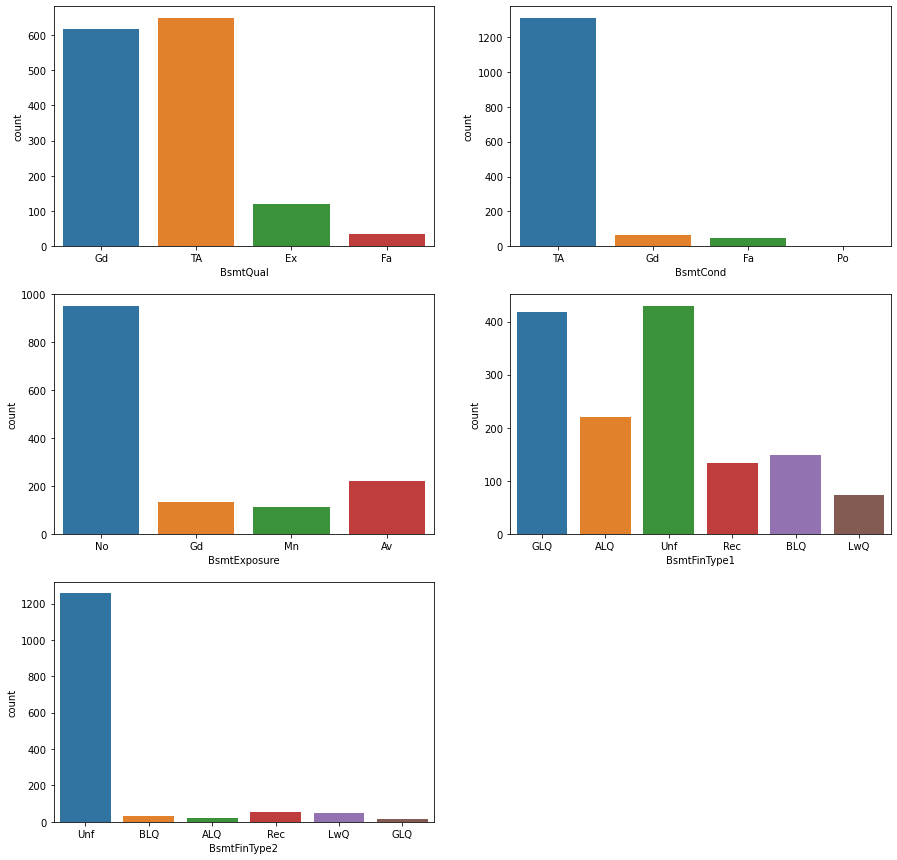

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(house["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(house["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(house["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(house["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(house["BsmtFinType2"])

1. BsmtQual - Most values are of type "TA" so we replace NULL values with "TA"
2. BsmtCond - Most values are of type "TA" so we replace NULL values with "TA"
3. BsmtExposure - Most values are of type "No" so we replace NULL values with "No"
4. BsmtFinType1 - Most values are of type "Unf" so we replace NULL values with "Unf"
5. BsmtFinType2 - Most values are of type "Unf" so we replace NULL values with "Unf"

In [28]:
house["BsmtQual"] = house["BsmtQual"].fillna("TA")
house["BsmtCond"] = house["BsmtCond"].fillna("TA")
house["BsmtExposure"] = house["BsmtExposure"].fillna("No")
house["BsmtFinType1"] = house["BsmtFinType1"].fillna("Unf")
house["BsmtFinType2"] = house["BsmtFinType2"].fillna("Unf")

**MasVnrType, MasVnrArea**

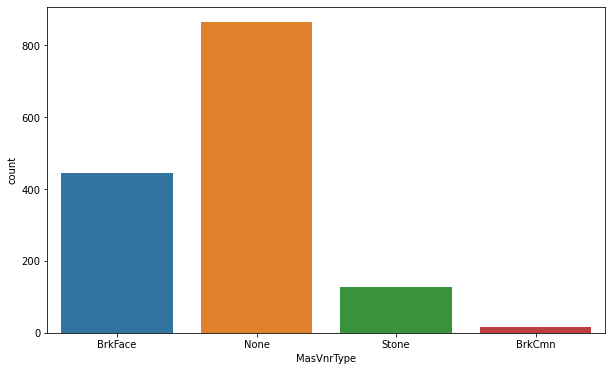

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(house["MasVnrType"])

In [30]:
#Most values are "None" so we replace NULL value with "None"
house["MasVnrType"] = house["MasVnrType"].fillna("None")

In [31]:
house["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [32]:
# most values are 0 so we replace NULL values with 0
house["MasVnrArea"] = house["MasVnrArea"].fillna(0.0)

**Electrical**

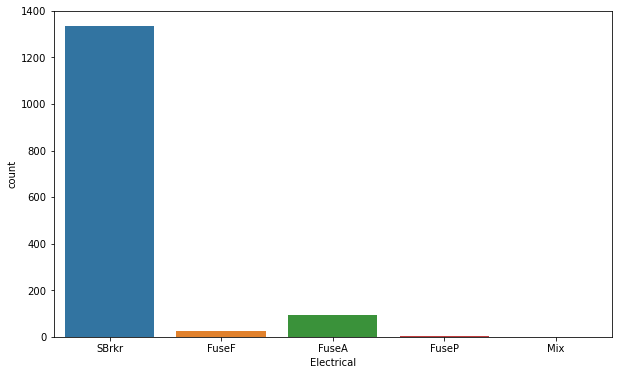

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(house["Electrical"])

In [34]:
#Most values are "SBrkr" so we replace NULL values with "SBrkr"
house["Electrical"] = house["Electrical"].fillna("SBrkr")

In [35]:
#Checking NULL values now

for column in house.columns:
    print(column+" "+str(round(100 * (house[column].isnull().sum()/len(house[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.0
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
MasVnrArea 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinSF1 0.0
BsmtFinType2 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageCars 0.0
GarageArea 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
Enclosed

We need to change the type of some of the columns 

In [36]:
#columns_to_convert_to_obj = ['MSSubClass','OverallQual','OverallCond']

In [37]:
house["GarageYrBlt"].value_counts()

2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
         ... 
1908.0      1
1927.0      1
1933.0      1
1900.0      1
1906.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [38]:
#house[columns_to_convert_to_obj] = house[columns_to_convert_to_obj].astype('object')

In [39]:
house["GarageYrBlt"] = house["GarageYrBlt"].astype('int64')

In [40]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

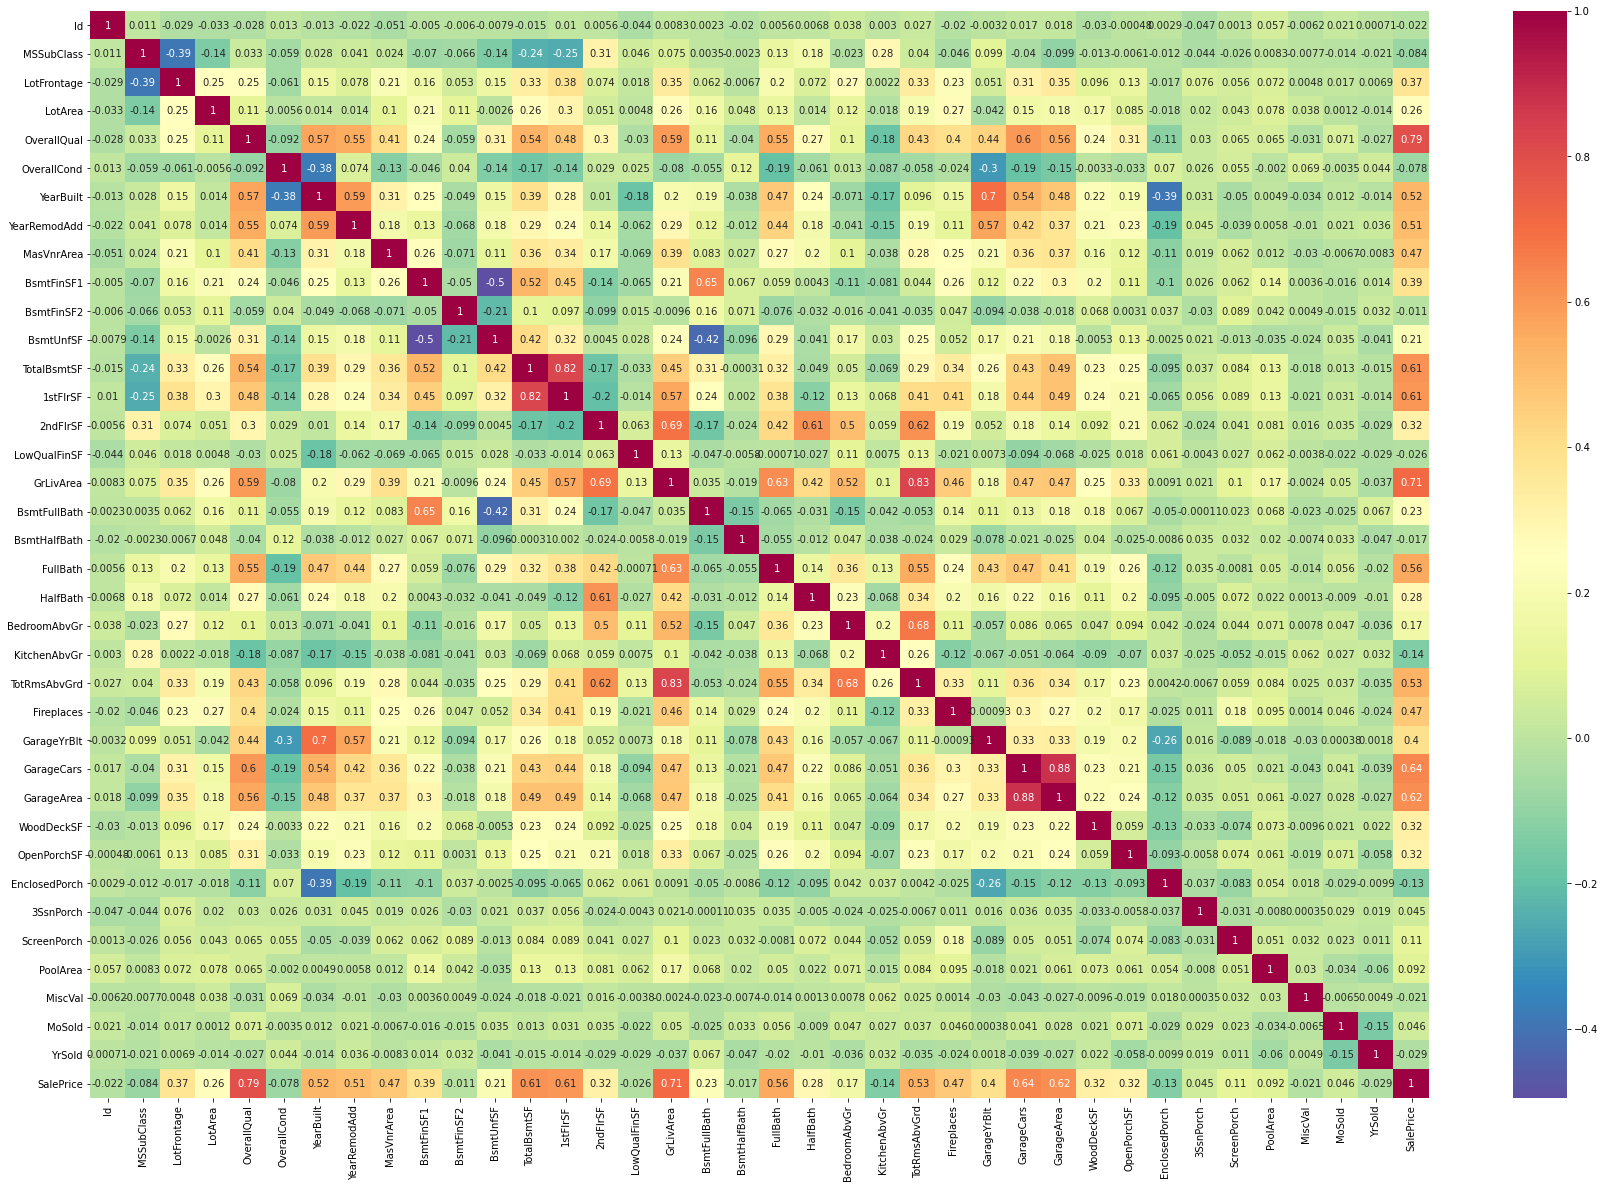

In [41]:
#making a heatmap
plt.figure(figsize=(30,20))
house_corr = house.corr()
sns.heatmap(house_corr,cmap="Spectral_r",annot=True)

**Observations**

The heatmap shows some helpful insights

Corelation of price with independent variables
- Price is highly (positively) corelated with overall material quality and finish, ground living area, garage size (in terms of car capacity), garage area (in sq feet), total bsmt area (sq feet), first floor area (sq feet), num of bathrooms, total rooms and year built. Interetingly, these are some of the factors, people consider while purchasing a house
- Price is negatively corelated with enclosed porch area (sq feet), type of dwelling, overall condition of the house (surprising isn't it?) and some more factors

Corelation among independent variables
- some independent variables have high corelation namely 1stfloor area and bsmt area, garage area (in terms of sq feet and cars), total rooms and living area etc
- some independent variables have negative corelation namely unfinished and finished basement area, bsmt full bathrooms and unfinished bsmt area etc

Care needs to be taken when building while building model for this data set as multi colinearity can cause problems

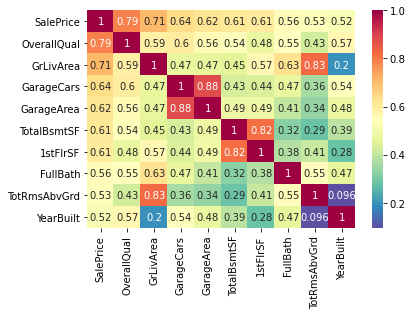

In [42]:
#Thats a lot of variables so performing EDA would be difficult. So we are choosing the top 10 corelated features to the price

#Top 10 heatmap
top_10_cols = house_corr.nlargest(10,'SalePrice')['SalePrice'].index

top_10_cm = np.corrcoef(house[top_10_cols].values.T)
sns.heatmap(top_10_cm,cmap="Spectral_r",annot=True, yticklabels=top_10_cols.values, xticklabels=top_10_cols.values)

### Checking for outliers

In [43]:
house_numeric_vars_1 = house[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]
house_numeric_vars_2 = house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]
house_numeric_vars_3 = house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]


In [44]:
#house_numeric_vars_1.describe(percentiles=[.25,.5,.75,.90,.95,.99])
#house_numeric_vars_2.describe(percentiles=[.25,.5,.75,.90,.95,.99])
house_numeric_vars_3.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [45]:
house_numeric_vars_to_cap = house[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]
type(house_numeric_vars_to_cap)

pandas.core.frame.DataFrame

In [46]:
#We will cap the values of the columns having outliers to the 95th percentile
for column in house_numeric_vars_to_cap.columns:
    percentile_95 = house[column].quantile([0.05,0.95]).values
    
    house[column][house[column] <= percentile_95[0]] = percentile_95[0]
    house[column][house[column] >= percentile_95[1]] = percentile_95[1]

### Changing Yes/No variables to 1/0

In [47]:
house['CentralAir'] = house['CentralAir'].map({'Y': 1, 'N': 0})

### Univariate and bi-variate analysis of top 10 features

**OverallQual**

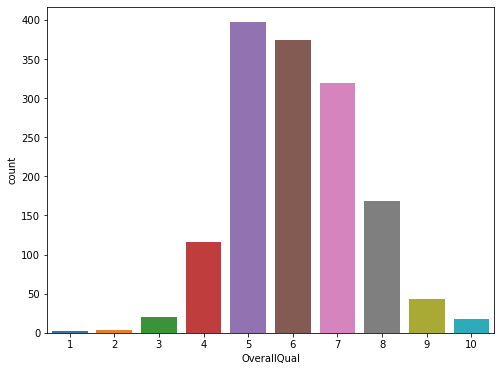

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(house["OverallQual"])

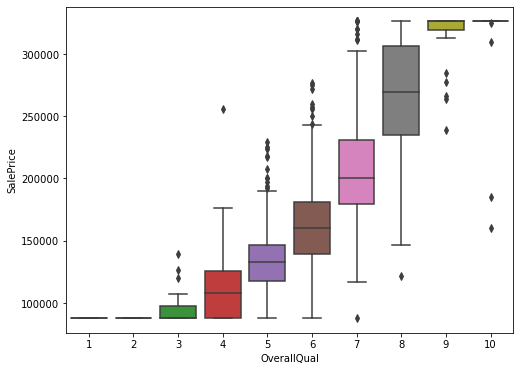

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual",y="SalePrice",data=house)

**Observations**
- Most of the houses have Overall quality as 5, 6 and 7
- People pay more for higher quality homes

**GrLivArea**

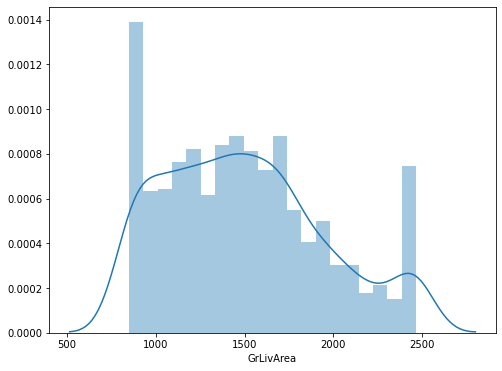

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(house["GrLivArea"],bins=20)

<Figure size 576x432 with 0 Axes>

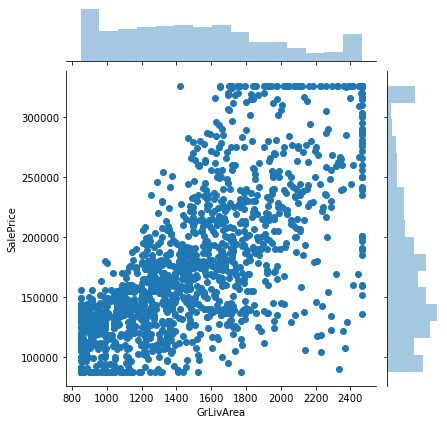

In [51]:
plt.figure(figsize=(8,6))
sns.jointplot(x=house["GrLivArea"],y=house["SalePrice"])

**Observations**
- Most of the houses have ground living area of roughly 760-780 sq feet and second most being around 1525 sq feet
- There is mostly linear relationship between the living area and price which is expected (with some exceptions)

**GarageCars**

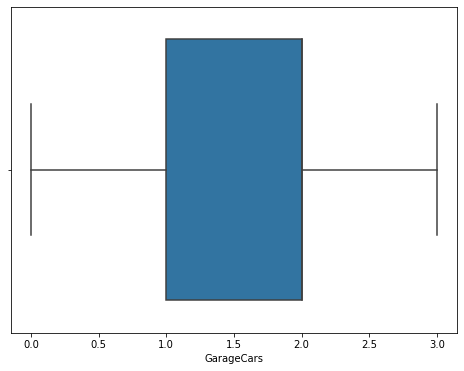

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(house["GarageCars"])

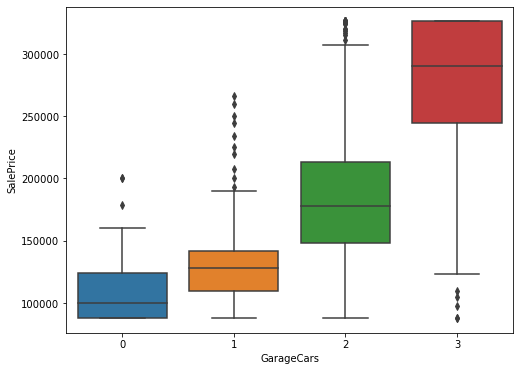

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(x="GarageCars",y="SalePrice",data=house)

**Observations**
- Most of the houses have the capacity to store 1-2 cars
- Houses having higher car storage capacity have higher prices

**GarageArea**

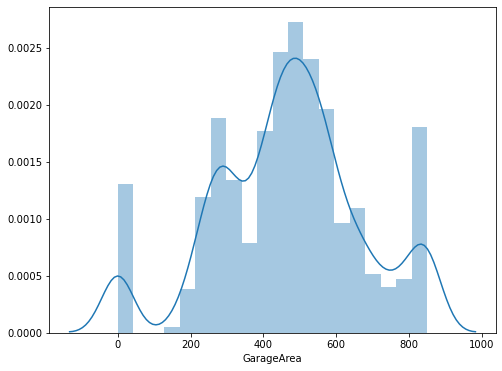

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(house["GarageArea"],bins=20)

<Figure size 576x432 with 0 Axes>

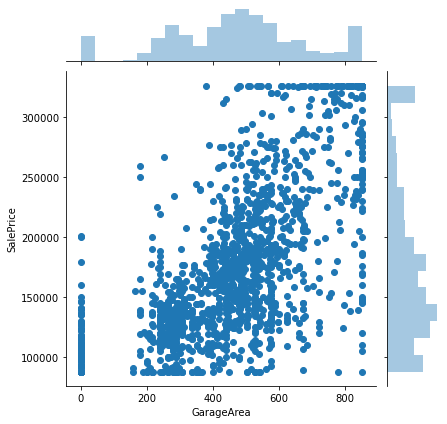

In [55]:
plt.figure(figsize=(8,6))
sns.jointplot(x=house["GarageArea"],y=house["SalePrice"])

**Observations**
- Most of the houses have a garage area of roughly 500 sq feet
- There is mostly a linear relationship between the garage area and price

**TotalBsmtSF**

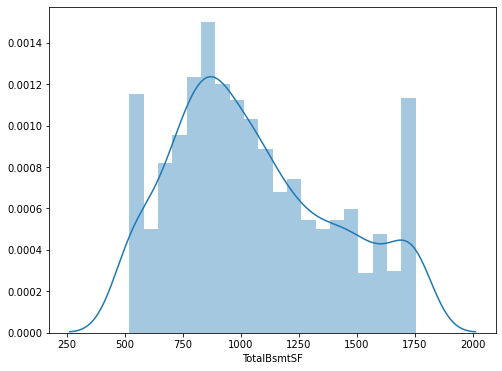

In [56]:
plt.figure(figsize=(8,6))
sns.distplot(house["TotalBsmtSF"],bins=20)

<Figure size 576x432 with 0 Axes>

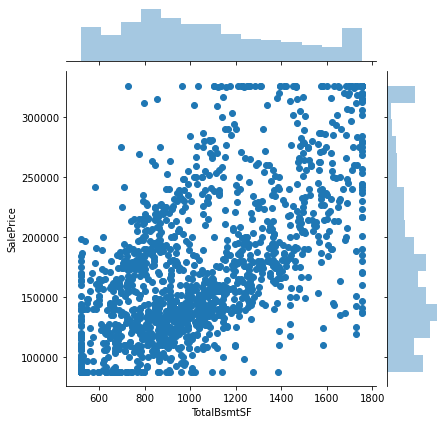

In [57]:
plt.figure(figsize=(8,6))
sns.jointplot(x=house["TotalBsmtSF"],y=house["SalePrice"])

**Observations**
- Most of the houses have basement area in range 875-1000 sq feet
- There is mostly a linear relationship between the basement area and price with few exceptions

**1stFlrSF**

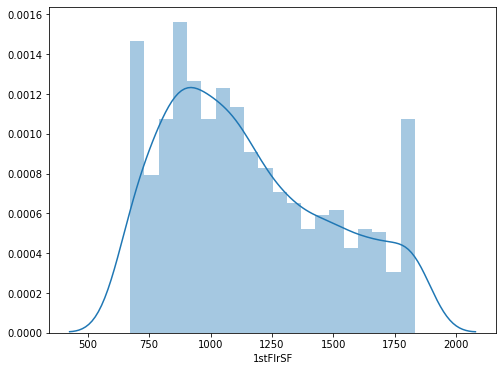

In [58]:
plt.figure(figsize=(8,6))
sns.distplot(house["1stFlrSF"],bins=20)

<Figure size 576x432 with 0 Axes>

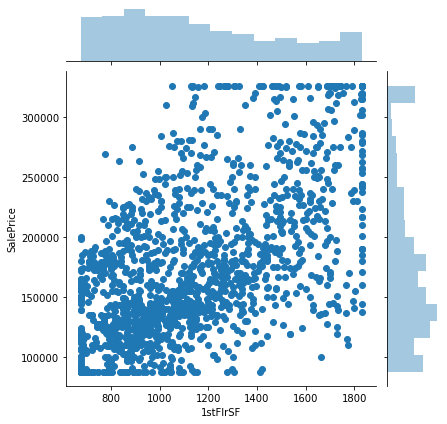

In [59]:
plt.figure(figsize=(8,6))
sns.jointplot(x=house["1stFlrSF"],y=house["SalePrice"])

**Observations**
- Most of the houses have 1st floor area in range roughly 875-1000 sq feet
- There is mostly a linear relationship between the 1st floor area and price with few exceptions

**FullBath**

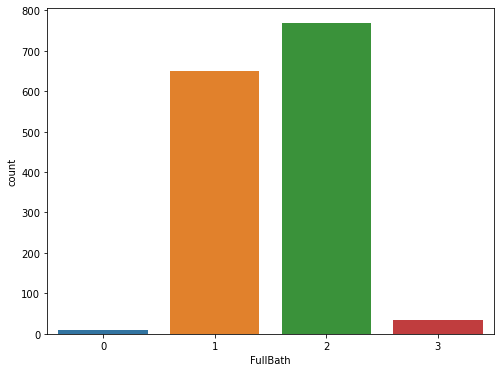

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(house["FullBath"])

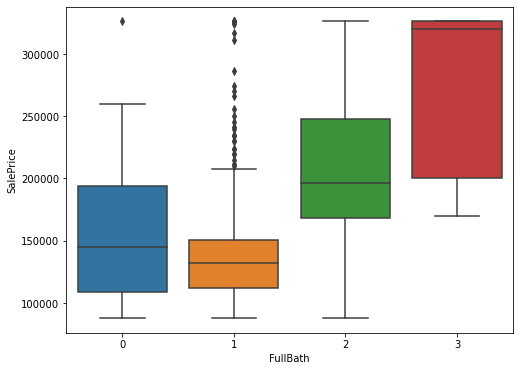

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(x="FullBath",y="SalePrice",data=house)

**Observations**
- Most of the houses have 2 or 1 bathrooms
- The price increases as the num of bathrooms increase, with few exceptions

**TotRmsAbvGrd**

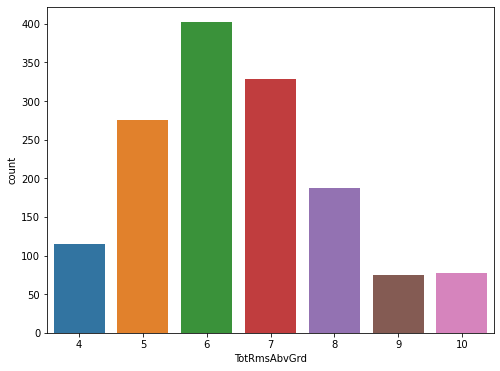

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(house["TotRmsAbvGrd"])

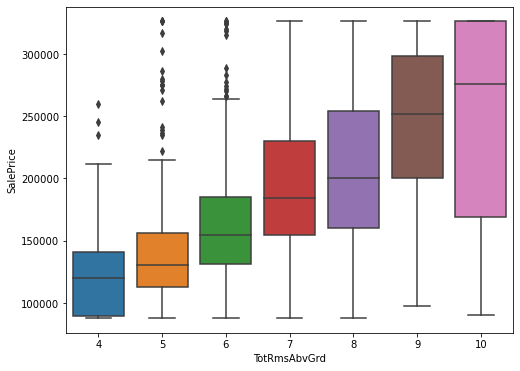

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=house)

**Observations**
 - Most of the houses have6 or 7 rooms
 - The price increases as the number of rooms increase with few exceptions

**YearBuilt**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

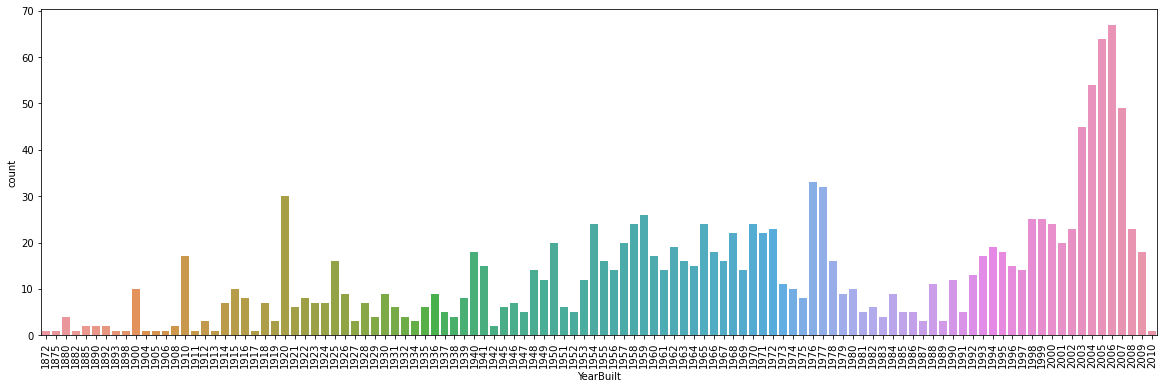

In [64]:
plt.figure(figsize=(20,6))
sns.countplot(house["YearBuilt"])
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

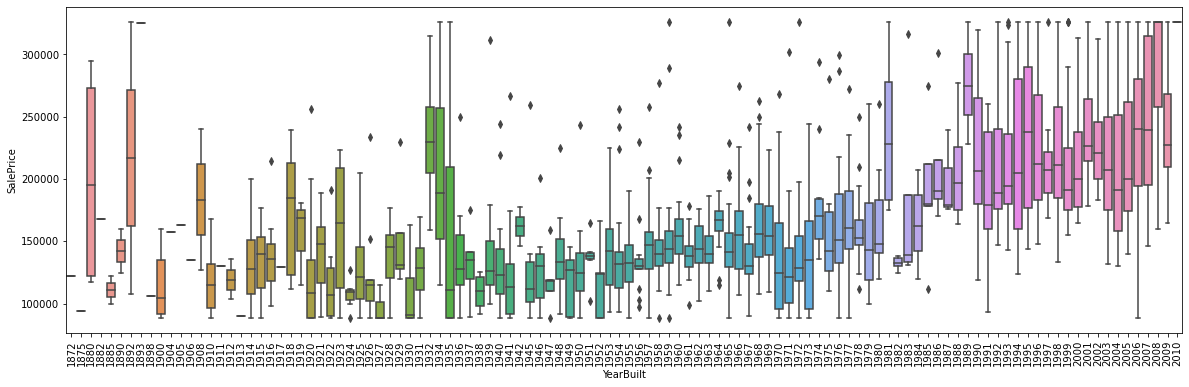

In [65]:
plt.figure(figsize=(20,6))
sns.boxplot(x="YearBuilt",y="SalePrice",data=house)
plt.xticks(rotation=90)

**Observations**
- Most of the houses have been constructed recently
- There is no constant pattern between the price and year. Causes for this can be inflation/depression in the economy in a certain year

### Dummy variable creation

In [66]:
house_categorical_vars_to_dummy = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [67]:
for column in house_categorical_vars_to_dummy:
    # Creating a dummy variable for the variables and dropping the first one.
    dummy_df = pd.get_dummies(house[column], prefix = column, drop_first=True)
    #Adding the results to the master dataframe
    house = pd.concat([house,dummy_df],axis = 1)

In [68]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [69]:
#dropping the original categorical columns
for column in house_categorical_vars_to_dummy:
    house = house.drop(column,1)

In [70]:
house.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,1915,1970,0.0,216,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
house.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

### Feature standardisation

In [72]:
standard_scaler = StandardScaler()

In [73]:
house[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(house[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = standard_scaler.fit_transform(house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = standard_scaler.fit_transform(house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])

In [74]:
house.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.260425,-0.355260,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,...,0,0,0,0,1,0,0,0,1,0
1,2,0.648283,-0.023731,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,...,0,0,0,0,1,0,0,0,1,0
2,3,-0.078684,0.451940,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,...,0,0,0,0,1,0,0,0,1,0
3,4,-0.563328,-0.038146,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,...,0,0,0,0,1,0,0,0,0,0
4,5,0.890605,1.319681,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,...,0,0,0,0,1,0,0,0,1,0


In [75]:
house.shape

(1460, 267)

# Model Building

## Train test split

In [76]:
#Independent variables
x = house.drop(['Id','SalePrice'],axis=1)

#Dependent variable
y = house['SalePrice']

y.head()

0    0.482420
1    0.064079
2    0.714833
3   -0.578928
4    1.125427
Name: SalePrice, dtype: float64

In [77]:
x.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.260425,-0.355260,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,-0.886955,...,0,0,0,0,1,0,0,0,1,0
1,0.648283,-0.023731,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,0.330182,...,0,0,0,0,1,0,0,0,1,0
2,-0.078684,0.451940,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,-0.695091,...,0,0,0,0,1,0,0,0,1,0
3,-0.563328,-0.038146,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,-0.572178,...,0,0,0,0,1,0,0,0,0,0
4,0.890605,1.319681,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,-0.020570,...,0,0,0,0,1,0,0,0,1,0


In [78]:
#Splitting the data into train test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
x_train.shape

(1021, 265)

In [80]:
x_test.shape

(438, 265)

In [81]:
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

## First training model Linear Regression

In [82]:
logis_reg_model_1 = sm.OLS(y_train, x_train_sm, family = sm.families.Binomial())
res = logis_reg_model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     76.04
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:49   Log-Likelihood:                 200.89
No. Observations:                1021   AIC:                             98.22
Df Residuals:                     771   BIC:                             1330.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.5085      0.627     -5.594      0.000      -4.740      -2.277
LotFrontage               0.0085      0.012      0.686      0.493      -0.016       0.033
LotArea                   0.0713      0.015      4.717      0.000       0.042       0.101
YearBuilt                 0.1753      0.033      5.273      0.000       0.110       0.241
YearRemodAdd              0.0554      0.015      3.793      0.000       0.027       0.084
MasVnrArea                0.0194      0.015      1.276      0.202      -0.010       0.049
BsmtFinSF1                0.0274      0.032      0.846      0.398      -0.036       0.091
BsmtFinSF2                0.0030      0.022      0.133      0.894      -0.041       0.047
BsmtUnfSF                -0.0411      0.031     -1.314      0.189      -0.103       0.020
TotalBsmtSF               0.1815      0.036      5.074      0.000       0.111       0.252
1stFlrSF                 -0.0286      0.039     -0.731      0.465      -0.105       0.048
2ndFlrSF                  0.0833      0.045      1.835      0.067      -0.006       0.172
LowQualFinSF            2.85e-14   4.61e-15      6.185      0.000    1.95e-14    3.75e-14
GrLivArea                 0.3363      0.046      7.310      0.000       0.246       0.427
BsmtFullBath              0.0182      0.012      1.508      0.132      -0.006       0.042
BsmtHalfBath             -0.0160      0.009     -1.777      0.076      -0.034       0.002
FullBath                  0.0100      0.015      0.674      0.501      -0.019       0.039
HalfBath                 -0.0198      0.027     -0.723      0.470      -0.074       0.034
BedroomAbvGr             -0.0199      0.014     -1.455      0.146      -0.047       0.007
KitchenAbvGr          -6.473e-15   2.41e-15     -2.685      0.007   -1.12e-14   -1.74e-15
TotRmsAbvGrd             -0.0109      0.019     -0.579      0.563      -0.048       0.026
Fireplaces               -0.0012      0.022     -0.053      0.958      -0.045       0.042
GarageYrBlt               0.0018      0.015      0.120      0.905      -0.028       0.032
GarageCars               -0.0088      0.024     -0.375      0.708      -0.055       0.037
GarageArea                0.0900      0.024      3.815      0.000       0.044       0.136
WoodDeckSF                0.0247      0.009      2.698      0.007       0.007       0.043
OpenPorchSF               0.0134      0.010      1.382      0.167      -0.006       0.032
EnclosedPorch             0.0040      0.010      0.412      0.681      -0.015       0.023
3SsnPorch             -4.082e-15   2.49e-15     -1.642      0.101   -8.96e-15    7.97e-16
ScreenPorch           -1.606e-05      0.008     -0.002      0.998      -0.017       0.016
PoolArea               1.675e-14   2.25e-15      7.453      0.000    1.23e-14    2.12e-14
MiscVal               -

### Making Predictions

In [83]:
y_train_pred = res.predict(x_train_sm)
y_test_pred = res.predict(x_test_sm)

Text(0.5, 0, 'Errors')

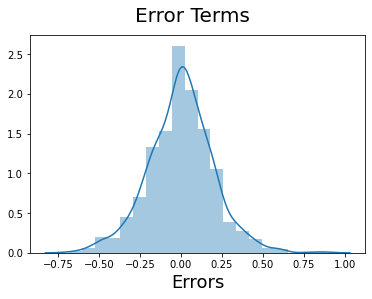

In [84]:
#calculating residuals
residual = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observations**

The error terms seem to be normalized and model r2 score is also very good.


Text(0, 0.5, 'y_pred')

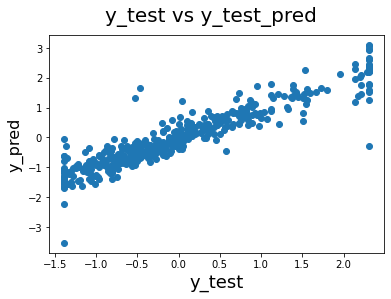

In [85]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

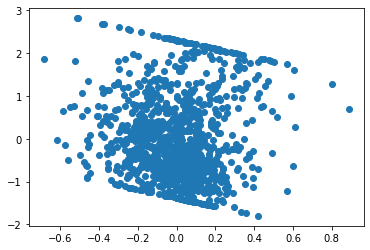

In [86]:
#Checking non-linearity in data by plotting residuals vs predictors
plt.scatter(y_train - y_train_pred, y_train_pred)

**Observations**
- The residuals should be scattered randomly around 0 - **No**
- The spread of residuals remains constant - **No**
- There are no extreme points - **No**


In [87]:

metric_linear = []

# Train R2 score
train_r2_linear= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_linear))
metric_linear.append(train_r2_linear)

# Test R2 score
test_r2_linear = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_linear))
metric_linear.append(test_r2_linear)

# Train RSS
train_rss_linear = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_linear))
metric_linear.append(train_rss_linear)

#Test RSS
test_rss_linear = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_linear))
metric_linear.append(test_rss_linear)

#Train MSE
train_mse_linear = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_linear))

#Test MSE
test_mse_linear = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_linear))

#Train RMSE
train_rmse_linear = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_linear))
metric_linear.append(train_rmse_linear)

#Test RMSE
test_rmse_linear = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_linear))
metric_linear.append(test_rmse_linear)

Train r2 = 0.9608731115227874
Test r2 = 0.8543246958620694
Train RSS = 40.33187313798488
Test RSS = 62.22270614922934
Train MSE = 0.03950232432711545
Test MSE = 0.14206097294344597
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


In [88]:
len(x_train.columns)

265

## Ridge Regression

In [89]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs = 60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done 140 out of 140 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [91]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(x_train, y_train)
print(ridge.coef_)

[ 1.46958687e-02  6.62682186e-02  1.13281967e-01  6.68591397e-02
  1.90594543e-02  3.47782337e-02 -2.26932528e-03 -4.39686905e-02
  1.66487304e-01 -2.75286716e-03  8.60824740e-02  0.00000000e+00
  3.06062342e-01  1.97325369e-02 -1.32534247e-02  1.72595410e-02
  8.17578588e-03 -1.66076390e-02  0.00000000e+00 -1.57320036e-02
  1.92539058e-02  1.06121339e-02  2.10294409e-02  7.08685973e-02
  2.66215163e-02  1.16310570e-02  5.80447055e-04  0.00000000e+00
  3.51779789e-03  0.00000000e+00  0.00000000e+00  7.11204393e-03
 -2.98307157e-03  5.33335551e-03  9.91161081e-03  5.06737481e-02
  1.29530067e-02 -6.48233803e-03  7.19345958e-02  5.28758107e-02
 -2.37438730e-02 -9.85794424e-03 -1.25391483e-01 -4.61338729e-02
 -9.64243166e-02 -6.13298156e-02 -9.68434894e-02  8.92552363e-02
  5.93832956e-02  4.97830875e-02 -1.28526152e-02 -2.73874474e-02
 -8.79594125e-03 -5.81552723e-02  5.86630536e-03  8.07294064e-02
  7.92688408e-02  9.92590307e-02 -2.65321589e-02  8.98250423e-02
 -4.39518142e-02 -4.41388

In [92]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

metric_ridge = []

# Train R2 score
train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge.append(train_r2_ridge)

# Test R2 score
test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge.append(test_r2_ridge)

# Train RSS
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge.append(train_rss_ridge)

#Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge.append(test_rss_ridge)

#Train MSE
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))

#Train RMSE
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
metric_ridge.append(train_rmse_ridge)

#Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))
metric_ridge.append(test_rmse_ridge)

Train r2 = 0.94354265961746
Test r2 = 0.8944768674326166
Train RSS = 58.196048258291086
Test RSS = 45.07239513616947
Train MSE = 0.05699906783378167
Test MSE = 0.10290501172641431
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


## Lasso Regression

In [93]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs=60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [95]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso_model = lasso.fit(x_train, y_train) 

In [96]:
lasso.coef_

array([ 1.31009607e-02,  6.74282162e-02,  1.39097452e-01,  6.49339111e-02,
        2.01022776e-02,  5.63796222e-02, -0.00000000e+00, -2.04827807e-02,
        1.45803329e-01, -1.70562135e-03,  5.97173474e-02,  0.00000000e+00,
        3.21619918e-01,  2.38555792e-02, -1.39843200e-02,  1.51525338e-02,
        4.33744571e-03, -1.87305229e-02,  0.00000000e+00, -1.40035655e-02,
        1.48231929e-02,  6.34371346e-03,  1.61905817e-02,  6.75854871e-02,
        2.80566686e-02,  8.48913141e-03,  5.74409170e-04,  0.00000000e+00,
        2.89468647e-03,  0.00000000e+00,  0.00000000e+00,  4.70136470e-03,
       -2.84593107e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.41204075e-01, -0.00000000e+00,
       -7.28904759e-02, -0.00000000e+00, -1.55216892e-01,  0.00000000e+00,
        0.00000000e+00,  2.17466229e-02, -2.42761829e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [97]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

metric_lasso = []

# Train R2 score
train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_lasso))
metric_lasso.append(train_r2_lasso)

# Test R2 score
test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_lasso))
metric_lasso.append(test_r2_lasso)

# Train RSS
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso.append(train_rss_lasso)

#Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso.append(test_rss_lasso)

#Train MSE
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))

#Train RMSE
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
metric_lasso.append(train_rmse_lasso)

#Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))
metric_lasso.append(test_rmse_lasso)

Train r2 = 0.9424639532374803
Test r2 = 0.8885944800228901
Train RSS = 59.30797538982909
Test RSS = 47.58495596737789
Train MSE = 0.0580881247696661
Test MSE = 0.10864145198031482
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


## Subjective question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Ridge regresison - Optimal alpha = 8**

**Lasso regresison - Optimal alpha = 0.001**

Going by the question, lets create a model where we double the alphas for ridge and lasso and check the new model

In [98]:
#Doubling the alphas
ridge_alpha_double = 16
lasso_alpha_double = 0.002

#Ridge regression model
ridge_double = Ridge(alpha=ridge_alpha_double)
ridge_double_model = ridge_double.fit(x_train, y_train)

#Lasso regression model
lasso_double = Lasso(alpha=lasso_alpha_double)   
lasso_double_model = lasso_double.fit(x_train, y_train)

In [99]:
y_train_pred = ridge_double.predict(x_train)
y_test_pred = ridge_double.predict(x_test)

metric_ridge_double = []

# Train R2 score
train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

# Test R2 score
test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)

# Train RSS
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge_double.append(train_rss_ridge)

#Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge_double.append(test_rss_ridge)

#Train MSE
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))

#Train RMSE
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
metric_ridge_double.append(train_rmse_ridge)

#Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))
metric_ridge_double.append(test_rmse_ridge)

Train r2 = 0.9376208643387143
Test r2 = 0.89549204789634
Train RSS = 64.30021613942962
Test RSS = 44.63877822315523
Train MSE = 0.06297768475948053
Test MSE = 0.101915018774327
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


In [100]:
y_train_pred = lasso_double.predict(x_train)
y_test_pred = lasso_double.predict(x_test)

metric_lasso_double = []

# Train R2 score
train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

# Test R2 score
test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)

# Train RSS
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso_double.append(train_rss_lasso)

#Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso_double.append(test_rss_lasso)

#Train MSE
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))

#Train RMSE
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
metric_lasso_double.append(train_rmse_lasso)

#Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))
metric_lasso_double.append(test_rmse_lasso)

Train r2 = 0.932501886908368
Test r2 = 0.8910078399387374
Train RSS = 69.57684191653874
Test RSS = 46.554130696308476
Train MSE = 0.06814578052550317
Test MSE = 0.10628796962627506
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


In [101]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_linear
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression Double' )
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression Double')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric_double, ls_metric_double], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression Double,Lasso Regression Double
0,R2 Score (Train),0.960873,0.943543,0.942464,0.937621,0.932502
1,R2 Score (Test),0.854325,0.894477,0.888594,0.895492,0.891008
2,RSS (Train),40.331873,58.196048,59.307975,64.300216,69.576842
3,RSS (Test),62.222706,45.072395,47.584956,44.638778,46.554131
4,MSE (Train),0.198752,0.198752,0.198752,0.198752,0.198752
5,MSE (Test),0.376910,0.376910,0.376910,0.376910,0.376910


In [102]:
print(max(ridge_double_model.coef_))
print(max(lasso_double_model.coef_))

0.3175015969948623
0.7042354212019799


**Finding the most important predictor before and after doubling alpha**

In [103]:
#
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0

#Calculating max coeff and most imp column of ridge model
for (coef,column) in zip(ridge_model.coef_, x_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column

#Calculating max coeff and most imp column of ridge_double model
for (coef,column) in zip(ridge_double_model.coef_, x_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column

#Calculating max coeff and most imp column of lasso model
for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column

#Calculating max coeff and most imp column of lasso_double model
for (coef,column) in zip(lasso_double_model.coef_, x_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
print("Ridge max col = ",ridge_max_col)
print("Ridge max coef = ",ridge_max_coef)
print()
print("Ridge_double max col = ",ridge_double_max_col)
print("Ridge_double max coef = ",ridge_double_max_coef)
print()
print("Lasso max col = ",lasso_max_col)
print("Lasso max coef = ",lasso_max_coef)
print()
print("Lasso_double max col = ",lasso_double_max_col)
print("Lasso_double max coef = ",lasso_double_max_coef)

Ridge max col =  OverallQual_9
Ridge max coef =  0.3955813193971312

Ridge_double max col =  OverallQual_9
Ridge_double max coef =  0.3175015969948623

Lasso max col =  OverallQual_9
Lasso max coef =  0.6832028240106429

Lasso_double max col =  OverallQual_9
Lasso_double max coef =  0.7042354212019799


**Observations**
- The most important predictor was always **OveralQual_9** for all the above models. 
- It also makes sense, realistically as the overall quality of the house will be the highest contributor to its price

## Subjective question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [104]:
#determining top 5 predictors
lasso_max_coef_list = []

for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [105]:
print(lasso_max_coef_list)

[-0.9310290964996335, -0.2412040754330459, -0.17058559265009807, -0.1626659402468024, -0.15521689209242018, -0.1512325804465004, -0.12645283312438071, -0.12028545601646934, -0.11746854566212374, -0.11716813001817039, -0.10266033331117426, -0.09810229337512631, -0.09650476697200903, -0.09561598894682882, -0.08746205129220855, -0.08693006357591948, -0.08438187274348834, -0.08114112709988797, -0.08044548452429176, -0.07289047586973273, -0.06748836998742758, -0.0617252435389548, -0.052811926285489114, -0.050647929449837065, -0.04867555280919446, -0.047317058598117655, -0.04295028331686364, -0.04288161256722543, -0.039077190403641326, -0.03476910045249833, -0.03457541659556393, -0.03425111410507025, -0.03357690594357149, -0.03272615914037604, -0.031031973778968706, -0.03047096088190656, -0.030350031888165485, -0.026780320929439716, -0.025126565043937177, -0.0242761829293404, -0.022665453581589844, -0.02262753211285748, -0.02197006786435793, -0.021304981440152422, -0.02048278074440641, -0.02

In [106]:
for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    print("{} {}".format(column,coef))

LotFrontage 0.013100960696074205
LotArea 0.06742821620354979
YearBuilt 0.1390974517116961
YearRemodAdd 0.06493391106322674
MasVnrArea 0.020102277599872483
BsmtFinSF1 0.05637962220439951
BsmtFinSF2 -0.0
BsmtUnfSF -0.02048278074440641
TotalBsmtSF 0.14580332936355736
1stFlrSF -0.0017056213541281737
2ndFlrSF 0.05971734743882946
LowQualFinSF 0.0
GrLivArea 0.3216199182877576
BsmtFullBath 0.02385557920388667
BsmtHalfBath -0.01398432004144259
FullBath 0.01515253381324293
HalfBath 0.004337445708801142
BedroomAbvGr -0.018730522854709147
KitchenAbvGr 0.0
TotRmsAbvGrd -0.014003565498392542
Fireplaces 0.014823192864060197
GarageYrBlt 0.006343713463742814
GarageCars 0.01619058167721185
GarageArea 0.06758548710933274
WoodDeckSF 0.028056668613893044
OpenPorchSF 0.008489131410720578
EnclosedPorch 0.0005744091698605192
3SsnPorch 0.0
ScreenPorch 0.0028946864701510843
PoolArea 0.0
MiscVal 0.0
MoSold 0.004701364697328419
YrSold -0.0028459310686930594
MSSubClass_30 0.0
MSSubClass_40 0.0
MSSubClass_45 0.0
MS

**Determining top 5 predictors from above info**

1. OverallQual_9
2. OverallCond_9 
3. OverallQual_8 
4. GrLivArea 
5. Neighborhood_Crawfor


In [107]:
#Drop the above 5 variables from x_train
x_train_excluding_top_5 = x_train.drop(['OverallQual_9','OverallCond_9','OverallQual_8','GrLivArea','Neighborhood_Crawfor'],axis=1)

#Lasso regression model
lasso_excluding_top_5 = Lasso(alpha=0.001)   
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(x_train_excluding_top_5, y_train)

In [108]:
#determining top 5 predictors
lasso_max_coef_excluding_top_5_list = []

for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)
lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-1.3881547981517195, -0.44306112789808266, -0.4354812164742762, -0.430353356818037, -0.39050263880247565, -0.34169009459520594, -0.2430751440868086, -0.22738215134609543, -0.21843502747540286, -0.2114705170837552, -0.20659007616271038, -0.2046876036732158, -0.20211414492183039, -0.1862923858096859, -0.18547374421954163, -0.17513505085263667, -0.1647578926024734, -0.16322609655150389, -0.15998585418732633, -0.15901993720375088, -0.15599722740658167, -0.14989958020312533, -0.14776146691619005, -0.14678852438087817, -0.14001622206667108, -0.12782097329444844, -0.0954987962031866, -0.0881056244073876, -0.08520629305580538, -0.08137241277806233, -0.07290339202909109, -0.07094428515568489, -0.06810101540380256, -0.06494912374973578, -0.061435041081014434, -0.059535963410430694, -0.054424366708067204, -0.052328245776023935, -0.05149303178535168, -0.043053336292796694, -0.0410147213355258, -0.03991364369096942, -0.03583186504582896, -0.033964622180234834, -0.029467819181498718, -0.02882068738

In [109]:
for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train_excluding_top_5.columns):
    print("{} {}".format(column,coef))

LotFrontage 0.01467100941928552
LotArea 0.07574956832104661
YearBuilt 0.09328686716113828
YearRemodAdd 0.07639402470907271
MasVnrArea 0.02740881305945476
BsmtFinSF1 0.06259704395381191
BsmtFinSF2 0.0028852711706700367
BsmtUnfSF -0.01926684922212744
TotalBsmtSF 0.1551409810653661
1stFlrSF 0.20119703116287252
2ndFlrSF 0.2998647619091354
LowQualFinSF 0.0
BsmtFullBath 0.021540382533775517
BsmtHalfBath -0.007164118437612532
FullBath 0.017284189620771943
HalfBath 0.011813399038234099
BedroomAbvGr -0.017801974126357117
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0027980671861464516
Fireplaces 0.0389949385878721
GarageYrBlt 0.00487088859502207
GarageCars 0.015168247840426658
GarageArea 0.0762893458557209
WoodDeckSF 0.025819183868352354
OpenPorchSF 0.011530275239051268
EnclosedPorch 0.0032556826290062032
3SsnPorch 0.0
ScreenPorch 0.0026785689385562623
PoolArea 0.0
MiscVal 0.0
MoSold 0.010542869704103555
YrSold -0.00557004049661962
MSSubClass_30 -0.0
MSSubClass_40 0.0
MSSubClass_45 0.0
MSSubClass_50 0.0
MSS

**Top 5 predictors now**
1. Condition2_PosA 
2. 2ndFlrSF 
3. Exterior1st_BrkFace 
4. Functional_Typ
5. Neighborhood_Somerst 